In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [6]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/DIABETES.csv", engine = "python", encoding="CP949")
df_raw.shape

(442, 11)

In [8]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


# KNN 기본

In [10]:
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.458
Score on test set: 0.245


In [11]:
train_score = []; test_score = []

para_n_neighbors = [i for i in range (1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_knn = pd.DataFrame()
df_score_knn["n_estimators"] = para_n_neighbors
df_score_knn["TrainScore"] = train_score
df_score_knn["TestScore"] = test_score


df_score_knn["D"] = df_score_knn["TrainScore"]-df_score_knn["TestScore"]

df_score_knn.round(3)

,n_estimators,TrainScore,TestScore,D
0,1,1.000,-0.368,1.368
1,2,0.687,0.005,0.682
2,3,0.558,0.134,0.424
3,4,0.496,0.223,0.273
4,5,0.458,0.245,0.213
5,6,0.443,0.269,0.174
6,7,0.413,0.292,0.121
7,8,0.413,0.309,0.104
8,9,0.417,0.312,0.104
9,10,0.414,0.313,0.101


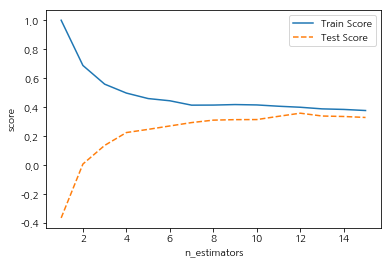

In [12]:
plt.plot(para_n_neighbors, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_neighbors, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [13]:
train_score = []; test_score = []

para_n_neighbors = [i for i in range (1,11)] * 2

para_weights = (["uniform"] * 10) + (["distance"] * 10)

for v_n_neighbors, v_weights in zip(para_n_neighbors,para_weights) :
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_weight = pd.DataFrame()
df_score_weight["Neighbors"] = para_n_neighbors
df_score_weight["Weights"] = para_weights
df_score_weight["TrainScore"] = train_score
df_score_weight["TestScore"] = test_score

df_score_weight

,Neighbors,Weights,TrainScore,TestScore
0,1,uniform,1.000000,-0.367522
1,2,uniform,0.687171,0.005292
2,3,uniform,0.557876,0.133955
3,4,uniform,0.496158,0.223094
4,5,uniform,0.458238,0.245024
5,6,uniform,0.442852,0.268714
6,7,uniform,0.412549,0.292024
7,8,uniform,0.413144,0.308925
8,9,uniform,0.416646,0.312327
9,10,uniform,0.414109,0.312866


In [14]:
df_score_weight_pivot = df_score_weight.pivot(index = "Neighbors", columns = "Weights", values = ["TrainScore","TestScore"])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000 -0.367522 -0.367522
2                1.0  0.687171  0.001411  0.005292
3                1.0  0.557876  0.128825  0.133955
4                1.0  0.496158  0.215626  0.223094
5                1.0  0.458238  0.246321  0.245024

In [15]:
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 + "_" + level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,-0.367522,-0.367522
2,1.0,0.687171,0.001411,0.005292
3,1.0,0.557876,0.128825,0.133955
4,1.0,0.496158,0.215626,0.223094
5,1.0,0.458238,0.246321,0.245024


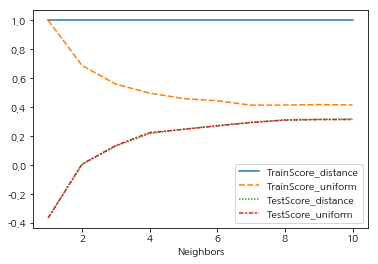

In [16]:
sns.lineplot(data=df_score_weight_pivot)

In [21]:
train_score = []; test_score = []

para_n_neighbors = [i for i in range (1,11)] * 3

para_metric = (["minkowski"] * 10) + (["euclidean"] * 10) + (["manhattan"] * 10)

for (v_n_neighbors, v_metric) in zip(para_n_neighbors,para_metric) :
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights = "uniform", metric = v_metric)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_metric = pd.DataFrame()
df_score_metric["Neighbors"] = para_n_neighbors
df_score_metric["Metric"] = para_metric
df_score_metric["TrainScore"] = train_score
df_score_metric["TestScore"] = test_score

df_score_metric

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000000,-0.367522
1,2,minkowski,0.687171,0.005292
2,3,minkowski,0.557876,0.133955
3,4,minkowski,0.496158,0.223094
4,5,minkowski,0.458238,0.245024
5,6,minkowski,0.442852,0.268714
6,7,minkowski,0.412549,0.292024
7,8,minkowski,0.413144,0.308925
8,9,minkowski,0.416646,0.312327
9,10,minkowski,0.414109,0.312866


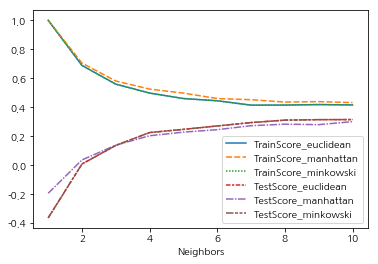

In [23]:
df_score_metric_pivot = df_score_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainScore","TestScore"])

level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1

sns.lineplot(data = df_score_metric_pivot)

In [19]:
knn_final = KNeighborsRegressor(n_neighbors=5, weights="uniform", metric="euclidean")
knn_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(knn_final.score(df_test_x, df_test_y)))

Score on training set: 0.458
Score on test set: 0.245


In [20]:
estimator = KNeighborsRegressor()

param_grid = {"n_neighbors" : para_n_neighbors, "weight" : para_weights, "metric" : para_metric}
grid_gt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gt.best_params_))
print("\nbest score:\n{}".format(grid_gt.best_score_.round(3)))

ValueError: Invalid parameter weight for estimator KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.